# Построение расчётных сеток

Расчётные сетки используются для дискретизации пространства при решении задач в частных производных.
В данной главе рассматривается создание сеток с помощью библиотеки NumPy, а именно с использованием функции [`meshgrid(...)`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) и внутреннего экземпляра [`mgrid`](https://numpy.org/doc/stable/reference/generated/numpy.mgrid.html).

Подключим NumPy:

In [1]:
from termcolor import colored
import numpy as np

## Пример задачи и её "плохое" решение

Пусть имеется прямоугольное поле в координатах $Oxy$ размера $w \times h$ (ширина $\times$ высота).
Разобьём поле на $n_x$ и $n_y$ точек по соответствующим осям.

In [2]:
w, h = 20, 10
n_x, n_y = 11, 6
# Разбиваем оси
x = np.linspace(0, w, n_x)
y = np.linspace(0, h, n_y)
x, y

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 array([ 0.,  2.,  4.,  6.,  8., 10.]))

Массивы `x` и `y` имеют разный размер.
Из-за этого становится проблемным их использование по правилам NumPy (подробнее см. [здесь](https://numpy.org/doc/stable/user/basics.broadcasting.html)).

Допустим нам нужно посчитать на расчётной сетки некоторую функцию

$$
z(x, y) = \sin{x} \cos{y}.
$$ (eqn:func)

В программе опишем эту функцию так:

In [3]:
def func(x, y):
    return np.sin(x) * np.cos(y)

Если сейчас вызвать эту функцию так `z(x, y)`, то получим ошибку:

In [4]:
# Хранит красный текст ошибки
value_err_text = colored("ValueError:", "red")

try:
    func(x, y)
except ValueError as ex:
    print(value_err_text, ex)

ValueError: operands could not be broadcast together with shapes (11,) (6,) 


Ошибка связана с транслированием индексов ([broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)'ом) NumPy-массивов `x` и `y` - их размерности не совпадают и не могут транслироваться по принятым правилам.

Можно запрограммировать "велосипед", суть которого заключается в использовании двух циклов для итерации по всем парам значений $(x_i, y_j)$:

In [5]:
z = []

for xi in x:
    for yj in y:
        z.append(func(xi, yj))
z = np.array(z)

z

array([ 0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.90929743, -0.37840125, -0.59435646,  0.87308037,
       -0.13230281, -0.76296558, -0.7568025 ,  0.31494096,  0.49467912,
       -0.72665927,  0.11011479,  0.63501143, -0.2794155 ,  0.11627788,
        0.18263816, -0.26828646,  0.04065496,  0.23444959,  0.98935825,
       -0.4117183 , -0.64668771,  0.94995239, -0.14395166, -0.83014234,
       -0.54402111,  0.22639266,  0.35559593, -0.52235291,  0.07915509,
        0.45647263, -0.53657292,  0.22329312,  0.35072746, -0.51520137,
        0.07807138,  0.45022306,  0.99060736, -0.41223812, -0.64750418,
        0.95115175, -0.1441334 , -0.83119043, -0.28790332,  0.11981005,
        0.18818617, -0.27643621,  0.04188994,  0.24157148, -0.75098725,
        0.31252097,  0.49087802, -0.72107564,  0.10926867,  0.63013202,
        0.91294525, -0.37991928, -0.59674084,  0.8765829 , -0.13283356,
       -0.76602637])

Попробуем построить точечный график:

In [6]:
import matplotlib.pyplot as plt

try:
    fig, ax = plt.subplots()
    ax.scatter(x, y, z, cmap="coolwarm")
except ValueError as ex:
    print(value_err_text, ex)
    plt.close(fig)

ValueError: x and y must be the same size


Разный размер `x` и `y` снова приводит к исключению.
Более того, массив `z` имеет совсем другой размер:

In [7]:
x.size, y.size, z.size

(11, 6, 66)

Чтобы построить график придётся снова записать двойной цикл, как при формировании `z`:

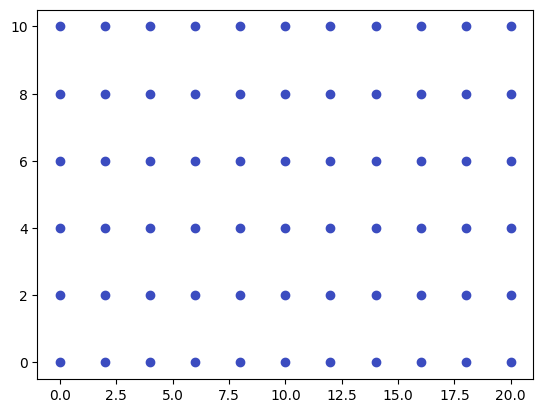

In [8]:
fig, ax = plt.subplots()

for xi in x:
    for yj in y:
        ax.scatter(
            xi, yj,
            c=func(xi, yj), cmap='coolwarm'
        )

Все точки имеют одинаковый (синий) цвет, соответствующий минимальному значению функцию, но функция {eq}`eqn:func` является тригонометрической и периодической - в массиве `z` лежат различные значения, следовательно, и цвета точек должны быть различными. Это обусловлено тем, что `ax.scatter(...)` вызывается как бы _атомарно_, т.е. с единицами данных, а не с целыми массивами данных.

Конечно, можно добиться правильного решения, усложняя код, на самом деле наполняя его "костылями" и "велосипедами".
Правильнее, быстрее и полезнее использовать готовые решения NumPy (или др. библиотек обработки данных).

## Использование `numpy.meshgrid`

### Регулярная сетка

Создадим _регулярную_ сетку, т.е. сетку, имеющую постоянные шаги по обоим направлениям:

In [9]:
X, Y = np.meshgrid(x, y)

Получили двумерные массивы `X` и `Y` одинакового размера:

In [10]:
X.shape, Y.shape

((6, 11), (6, 11))

Выглядят они так:

In [11]:
X, Y

(array([[ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.],
        [ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.],
        [ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.],
        [ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.],
        [ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.],
        [ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]]),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
        [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
        [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
        [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]]))

Теперь нет никаких проблем напрямую вызвать `func` с аргументами `X` и `Y`:

In [12]:
Z = func(X, Y)
Z

array([[ 0.        ,  0.90929743, -0.7568025 , -0.2794155 ,  0.98935825,
        -0.54402111, -0.53657292,  0.99060736, -0.28790332, -0.75098725,
         0.91294525],
       [-0.        , -0.37840125,  0.31494096,  0.11627788, -0.4117183 ,
         0.22639266,  0.22329312, -0.41223812,  0.11981005,  0.31252097,
        -0.37991928],
       [-0.        , -0.59435646,  0.49467912,  0.18263816, -0.64668771,
         0.35559593,  0.35072746, -0.64750418,  0.18818617,  0.49087802,
        -0.59674084],
       [ 0.        ,  0.87308037, -0.72665927, -0.26828646,  0.94995239,
        -0.52235291, -0.51520137,  0.95115175, -0.27643621, -0.72107564,
         0.8765829 ],
       [-0.        , -0.13230281,  0.11011479,  0.04065496, -0.14395166,
         0.07915509,  0.07807138, -0.1441334 ,  0.04188994,  0.10926867,
        -0.13283356],
       [-0.        , -0.76296558,  0.63501143,  0.23444959, -0.83014234,
         0.45647263,  0.45022306, -0.83119043,  0.24157148,  0.63013202,
        -0.766

Размер `Z` тот же:

In [13]:
Z.shape

(6, 11)

И так же легко правильно построить график:

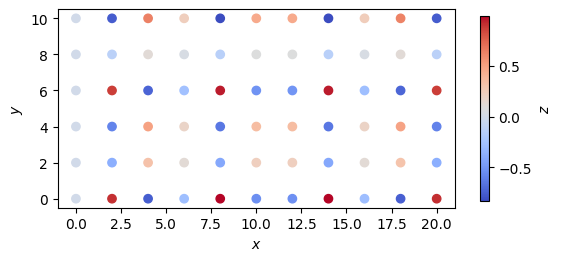

In [14]:
fig, ax = plt.subplots()
img = ax.scatter(X, Y, c=Z, cmap="coolwarm")
fig.colorbar(img, ax=ax, label="$z$", shrink=0.5)
ax.set(xlabel="$x$", ylabel="$y$", aspect="equal");

Или заполненный контурный график (и более плотная сетка):

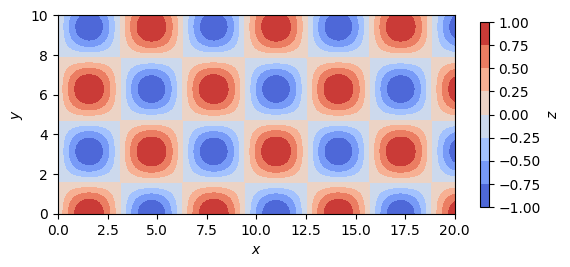

In [15]:
# Больше точек
x, y = np.linspace(0, w, 300), np.linspace(0, h, 200)
# Сетка
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig, ax = plt.subplots()
img = ax.contourf(X, Y, Z, cmap="coolwarm")
fig.colorbar(img, ax=ax, label="$z$", shrink=0.5)
ax.set(xlabel="$x$", ylabel="$y$", aspect="equal");

### Неравномерная сетка

Разобьём оси в геометрической прогрессии:

In [16]:
xg = np.array([
    2**i for i in range(6)
])
yg = np.array([
    3**i for i in range(4)
])
X, Y = np.meshgrid(xg, yg)
X, Y

(array([[ 1,  2,  4,  8, 16, 32],
        [ 1,  2,  4,  8, 16, 32],
        [ 1,  2,  4,  8, 16, 32],
        [ 1,  2,  4,  8, 16, 32]]),
 array([[ 1,  1,  1,  1,  1,  1],
        [ 3,  3,  3,  3,  3,  3],
        [ 9,  9,  9,  9,  9,  9],
        [27, 27, 27, 27, 27, 27]]))

Построим точечный график:

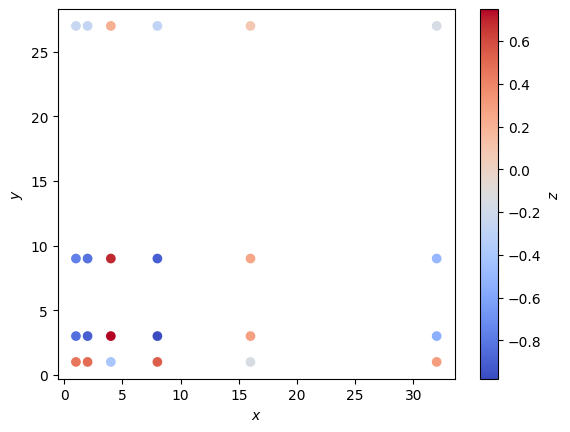

In [17]:
Z = func(X, Y)

fig, ax = plt.subplots()
img = plt.scatter(X, Y, c=Z, cmap="coolwarm")
fig.colorbar(img, ax=ax, label="$z$")
ax.set(xlabel="$x$", ylabel="$y$");

## Использование `numpy.mgrid`

Создать равномерную сетку можно и так:

In [18]:
# Сетка размером 20 на 10
# с шагом 2 по каждому направлению:
# синтаксис похож на синтаксис среза,
# только шаг может быть действительным числом
X, Y = np.mgrid[0:10:2, 0:6:1.5]
X, Y

(array([[0., 0., 0., 0.],
        [2., 2., 2., 2.],
        [4., 4., 4., 4.],
        [6., 6., 6., 6.],
        [8., 8., 8., 8.]]),
 array([[0. , 1.5, 3. , 4.5],
        [0. , 1.5, 3. , 4.5],
        [0. , 1.5, 3. , 4.5],
        [0. , 1.5, 3. , 4.5],
        [0. , 1.5, 3. , 4.5]]))

Полученные массивы по сути своей ничем не отличаются от созданных с помощью `meshgrid`.

Однако крайние значения 10 и 5 интервалов в массивы не вошли.
Можно это исправить двумя способами:

* увеличив правую границу интервала на величину шага или меньше:

In [19]:
# 12 вместо 10, 7 вместо 6
X, Y = np.mgrid[0:12:2, 0:7:1.5]
X, Y

(array([[ 0.,  0.,  0.,  0.,  0.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 4.,  4.,  4.,  4.,  4.],
        [ 6.,  6.,  6.,  6.,  6.],
        [ 8.,  8.,  8.,  8.,  8.],
        [10., 10., 10., 10., 10.]]),
 array([[0. , 1.5, 3. , 4.5, 6. ],
        [0. , 1.5, 3. , 4.5, 6. ],
        [0. , 1.5, 3. , 4.5, 6. ],
        [0. , 1.5, 3. , 4.5, 6. ],
        [0. , 1.5, 3. , 4.5, 6. ],
        [0. , 1.5, 3. , 4.5, 6. ]]))

* передав в третьей позиции коплексное число - оно будет интерпретировано как число точек разбиения по аналогии с `numpy.linspace`:

In [20]:
X, Y = np.mgrid[0:10:6j, 0:6:5j]
X, Y

(array([[ 0.,  0.,  0.,  0.,  0.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 4.,  4.,  4.,  4.,  4.],
        [ 6.,  6.,  6.,  6.,  6.],
        [ 8.,  8.,  8.,  8.,  8.],
        [10., 10., 10., 10., 10.]]),
 array([[0. , 1.5, 3. , 4.5, 6. ],
        [0. , 1.5, 3. , 4.5, 6. ],
        [0. , 1.5, 3. , 4.5, 6. ],
        [0. , 1.5, 3. , 4.5, 6. ],
        [0. , 1.5, 3. , 4.5, 6. ],
        [0. , 1.5, 3. , 4.5, 6. ]]))

```{note}
Используя `mgrid` невозможно построить сетки с переменным шагом.
```

## Заключение

1. Универсальным инструментом построения прямоугольных сеток служит функция `numpy.meshgrid(...)`.
2. С помощью `numpy.mgrid` можно строить регулярные сетки. Данный способ привносит некоторый "синтаксический сахар" - не нужно создавать предварительные массивы, как в случае с `meshgrid(...)`.

## См. также

1. Для построения сложных расчётных сеток в Python (для методов конечных элементов) существуют такие библиотеки, как [PyMesh](https://pymesh.readthedocs.io/en/latest/), [scikit-fem](https://pypi.org/project/scikit-fem/) и др.